<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/Des_Grd_Batch_Parab_Aula_B228_OCT_10_RV_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

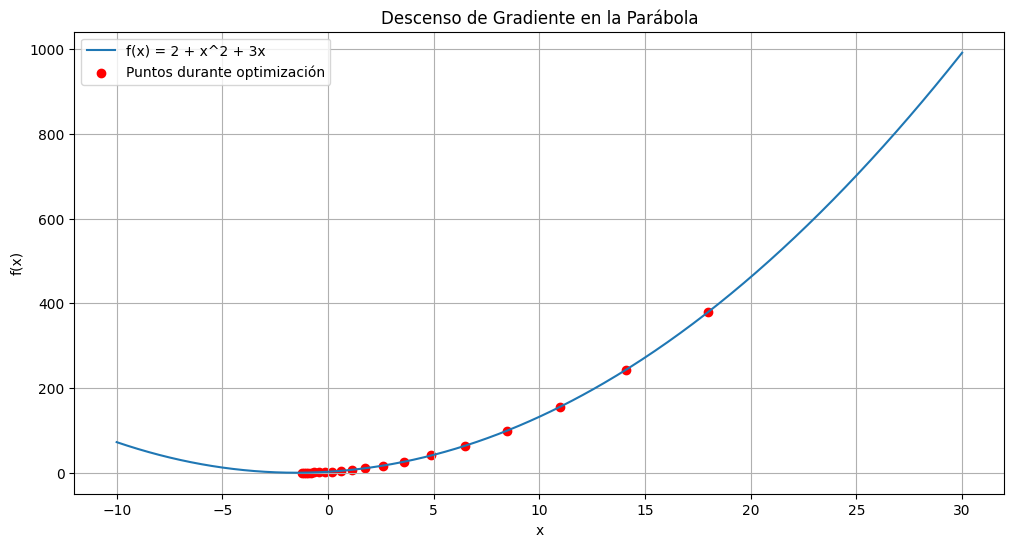

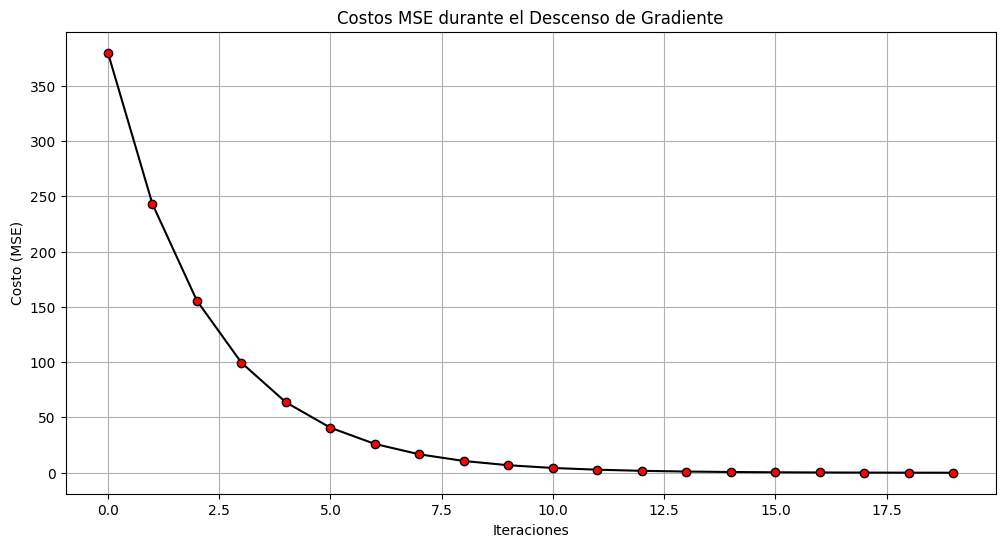

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función objetivo f(x)
def f(x):
    return 2 + x**2 + 3*x

# Definir la derivada de f(x)
def df(x):
    return 2*x + 3

# Descenso de gradiente
def gradient_descent(x_start, learning_rate, num_iterations):
    x_history = []
    cost_history = []

    x = x_start

    for _ in range(num_iterations):
        x_history.append(x)
        cost = f(x)
        cost_history.append(cost)
        gradient = df(x)
        x -= learning_rate * gradient

    return x_history, cost_history

# Parámetros del descenso de gradiente
x_start = 18
learning_rate = 0.1
num_iterations = 20

x_history, cost_history = gradient_descent(x_start, learning_rate, num_iterations)

# Gráfica de la parábola y los puntos durante la optimización
plt.figure(figsize=(12,6))
x_range = np.linspace(-10, 30, 400)
y_range = f(x_range)
plt.plot(x_range, y_range, label='f(x) = 2 + x^2 + 3x')
plt.scatter(x_history, [f(x) for x in x_history], c='red', marker='o', label='Puntos durante optimización')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Descenso de Gradiente en la Parábola')
plt.grid(True)
plt.show()

# Gráfica de los costos MSE durante la optimización
plt.figure(figsize=(12,6))
plt.plot(range(num_iterations), cost_history, color='black',marker='o',markerfacecolor='red')
plt.xlabel('Iteraciones')
plt.ylabel('Costo (MSE)')
plt.title('Costos MSE durante el Descenso de Gradiente')
plt.grid(True)
plt.show()


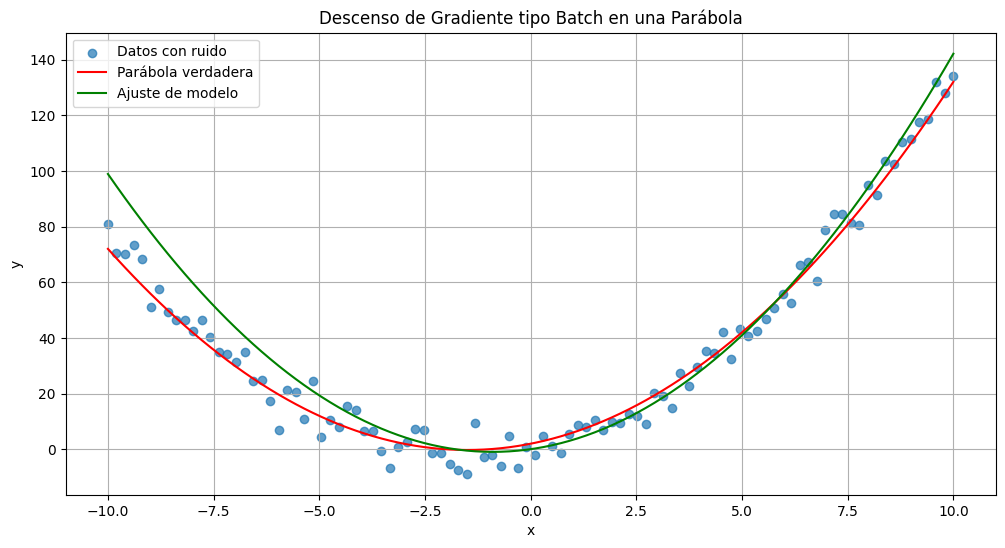

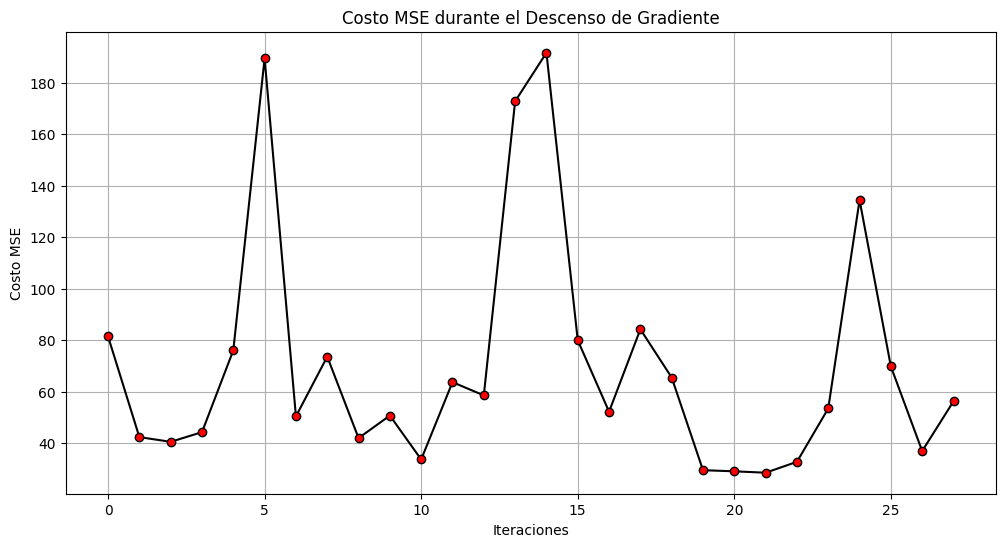

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Función objetivo f(x) = 2 + x^2 + 3x
def f(x):
    return 2 + x**2 + 3*x

# Generar un conjunto de datos sintético con ruido
np.random.seed(0)
X = np.linspace(-10, 10, 100)
y = f(X) + np.random.normal(0, 5, 100)

# Función de costo Mean Squared Error (MSE)
def mse_loss(y_pred, y_true):
    return ((y_pred - y_true)**2).mean()

# Gradiente del costo MSE con respecto a los parámetros
def gradient(theta, X_batch, y_batch):
    y_pred = theta[0] + theta[1] * X_batch + theta[2] * X_batch**2
    grad = np.zeros(3)
    grad[0] = (y_pred - y_batch).mean()
    grad[1] = ((y_pred - y_batch) * X_batch).mean()
    grad[2] = ((y_pred - y_batch) * X_batch**2).mean()
    return grad

# Descenso de gradiente tipo Batch
def batch_gradient_descent(X, y, learning_rate, num_iterations, batch_size):
    theta = np.zeros(3)  # Inicialización de parámetros
    history = []

    for _ in range(num_iterations):
        indices = np.random.choice(len(X), batch_size, replace=False)
        X_batch, y_batch = X[indices], y[indices]
        grad = gradient(theta, X_batch, y_batch)
        theta -= learning_rate * grad
        history.append(theta.copy())

    return theta, history

# Parámetros del descenso de gradiente
learning_rate = 0.001
num_iterations = 28
batch_size = 10

# Ejecutar el descenso de gradiente
optimal_params, history = batch_gradient_descent(X, y, learning_rate, num_iterations, batch_size)

# Graficar la parábola y los puntos de datos
plt.figure(figsize=(12,6))
plt.scatter(X, y, label='Datos con ruido', alpha=0.7)
x_range = np.linspace(-10, 10, 100)
plt.plot(x_range, f(x_range), label='Parábola verdadera', color='red')
plt.plot(x_range, optimal_params[0] + optimal_params[1] * x_range + optimal_params[2] * x_range**2,
         label='Ajuste de modelo', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Descenso de Gradiente tipo Batch en una Parábola')
plt.grid(True)
plt.show()

# Graficar el costo MSE a lo largo de las iteraciones
plt.figure(figsize=(12,6))
loss_history = []
theta = optimal_params.copy()
for _ in range(num_iterations):
    y_pred = theta[0] + theta[1] * X + theta[2] * X**2
    loss_history.append(mse_loss(y_pred, y))
    indices = np.random.choice(len(X), batch_size, replace=False)
    X_batch, y_batch = X[indices], y[indices]
    grad = gradient(theta, X_batch, y_batch)
    theta -= learning_rate * grad

plt.plot(range(num_iterations),loss_history ,color='black', marker='o',markerfacecolor='red')
plt.xlabel('Iteraciones')
plt.ylabel('Costo MSE')
plt.title('Costo MSE durante el Descenso de Gradiente')
plt.grid(True)
plt.show()
